# Logistic Regression:
It is an algorithm used to perform binatry classification tasks. It is used to predict outcomes for a given set of independent variables and the dependent variables outcome is discrete.  ( target variable belonging to one of two categories based on a set of independent variables.)
Since the model outputs probabilities between 0 and 1, a threshold value must be set to determine the predicted class. For example, if the probability is greater than 0.5, the outcome is classified as 1; otherwise, it is classified as 0.

## Where it is used:

- In healthcare, to predict whether a patient will get a disease (disease / no disease).
- In email filtering, to decide if an email is spam or not spam.
- In finance, to predict whether a customer will default on a loan (default / no default) or whether a transaction is fraudulent.
- In business and marketing, to predict if a customer will churn (leave) or stay subscribed.

### Intuition
- First make a straight-line score from the inputs (like age, salary, etc.).
- Then pass that score through a sigmoid function to turn it into a probability between 0 and 1.
- Finally, use a threshold (like 0.5) to convert the probability into class 0 or 1.

-----

### 1. Linear part (score)

Given features $x_1, x_2, \ldots, x_n$ and weights $w_1, w_2, \ldots, w_n$ with bias $b$:

$$
z = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b
$$

This $z$ can be any real number (negative, zero, or positive).

### 2. Sigmoid function

The sigmoid (logistic) function turns $z$ into a value between 0 and 1:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This $\sigma(z)$ is interpreted as the probability that the class is 1.

### 3. Prediction rule (threshold)

$$
\hat{y} = 
\begin{cases} 
1 & \text{if } \sigma(z) \ge 0.5 \\ 
0 & \text{if } \sigma(z) < 0.5 
\end{cases}
$$

Or simply: probability $\ge 0.5$ → class 1, else class 0.

---
## Implementation: Use case ( Predicting numbers in Image)

In [84]:
# Importing libraries and their associated methods

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

#  Loads a built-in dataset of 1797 handwritten digit images (0-9).
digits=load_digits()

In [85]:
# Determining the total number of images and label

print("Image Data shape", digits.data.shape)
#  1797 rows × 64 columns (flattened 8×8 pixel images)

print("label Data Shape", digits.target.shape)
# Shape output: (1797, 64) for data, (1797,) for labels

Image Data shape (1797, 64)
label Data Shape (1797,)


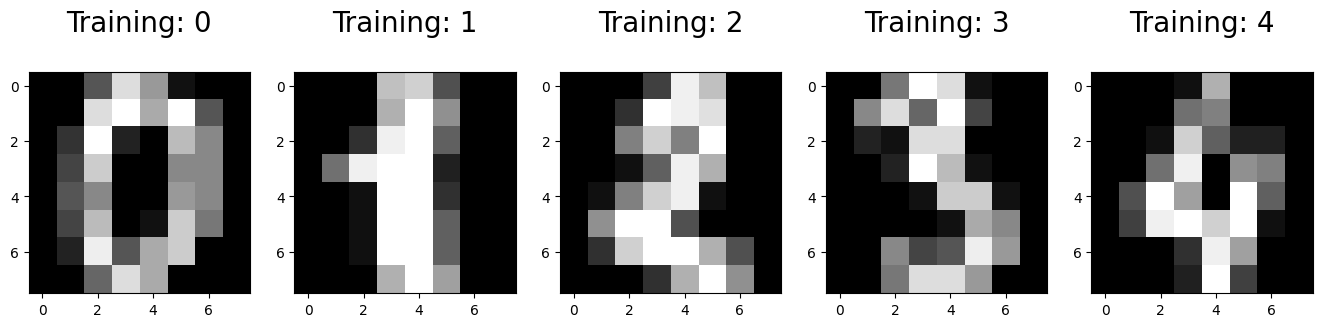

In [86]:
# Displaying images and label (only some)

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,6,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n"% label, fontsize=20)

In [87]:
# Dividing dataset into Training and Test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(digits.data, digits.target,test_size=0.23, random_state=2)

# Splits data into training (77%) and testing (23%) sets.
# Fixed random split (same result every run)
# ← x = all pixel features  
# y = all digit labels (0-9)

##### Complete Flow:
Load dataset → Check shapes → Split into train/test → Train model on x_train/y_train → Test on x_test/y_test

In [88]:
print(x_train.shape)

(1383, 64)


In [89]:
print(y_train.shape)

(1383,)


In [90]:
print(x_test.shape)

(414, 64)


In [91]:
print(y_test.shape)

(414,)


In [92]:
from sklearn.linear_model import LogisticRegression

logisticregr=LogisticRegression()
logisticregr.fit(x_train,y_train)

d:\python_env\Machine_learning_portfolio\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [93]:
# Predicting the output of the first element of the test set

print(logisticregr.predict(x_test[0].reshape(1,-1)))

[4]


In [94]:
# Predicting the output of the first 10 elements of the test set

logisticregr.predict(x_test[:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [95]:
# Predicting the entire dataset

prediction=logisticregr.predict(x_test)

In [ ]:
# Determining the accuracy of model
Score= logisticregr.score(x_test,y_test)
print(f"{Score:.2f}")
#0.95 percent accurate

0.95


In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy_score:0.9516908212560387')

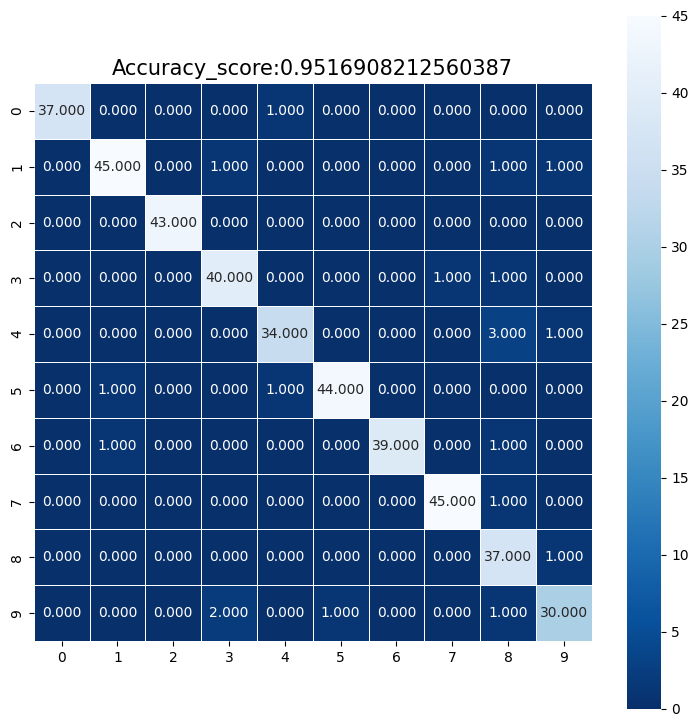

In [105]:
# Representing the confusion matrix in heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap="Blues_r");
plt.ylabel=("Actual label");
plt.ylabel=("Predicted label");
all_sample_title="Accuracy_score:{0}".format(Score)
plt.title(all_sample_title,size=15)


For a well-performing classifier, the confusion-matrix heatmap should have its highest values along the diagonal and only small values in the off-diagonal cells, which holds in this case: the heatmap shows that 34 images were predicted as class 4, while only 3 and 1 images were misclassified as classes 8 and 9 respectively, indicating a small amount of noise or error.

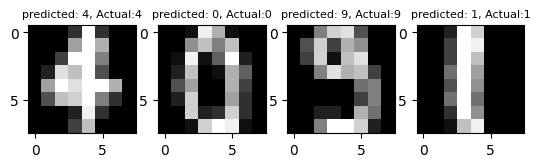

In [118]:
index=0
classifiedIndex=[]
for predict, actual in zip(prediction,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1

plt.Figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted: {}, Actual:{}" .format(prediction[wrong],y_test[wrong]),fontsize=8)